In [1]:
from data.data_preprocessing import *
from algoritma.clustering import *
from sklearn.metrics import silhouette_score

In [2]:
#path file dataset
path = "data/dataset/BIKE DETAILS.csv"
#cetak dataset
print("sumber data : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho")
dataset = load_dataset(path)
print("\n\t\tDataset")
print(dataset)

sumber data : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

		Dataset
                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150   


		Exploratory Data Analysis (EDA)

	informasi umum dataset)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB

	kolom kategorical dan numerikal
Kolom Kategorikal :  ['name', 'seller_type', 'owner']
Kolom Numerikal :  ['selling_price', 'year', 'km_driven', 'ex_showroom_price']

	Kolom dengan data hilang
Kolom dengan data hilang :  ['ex_showroom_price']
Jumlah data hilang : 
 ex_showroom_price    435
dtype: int64
Perlu penanganan data kosong! Pen

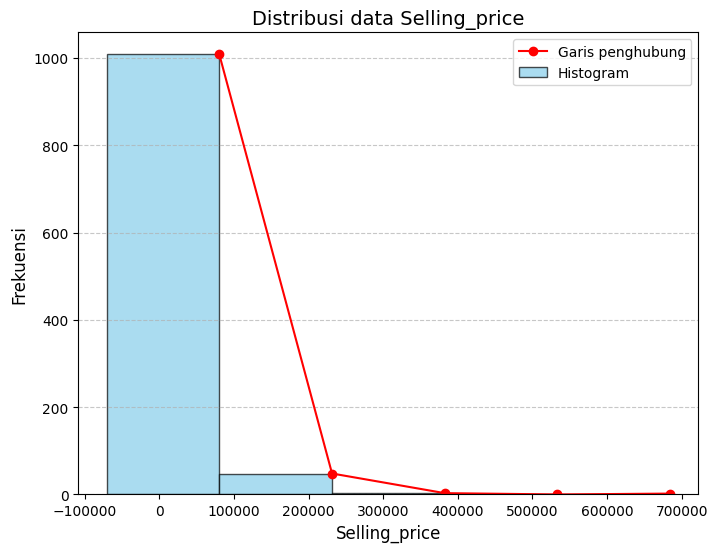

--- Distribusi data Selling_price ---
Rentang 5000-156000: 1008 data
Rentang 156001-307000: 48 data
Rentang 307001-458000: 3 data
Rentang 609001-760000: 2 data
Terendah pada rentang 458000-609000, 0 data
Tertinggi pada rentang 5000-156000, 1008 data




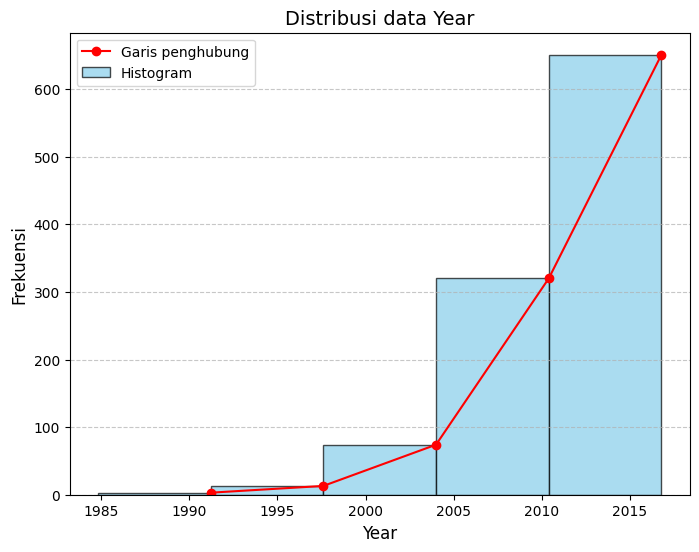

--- Distribusi data Year ---
Rentang 1988-1994: 3 data
Rentang 1995-2000: 13 data
Rentang 2001-2007: 74 data
Rentang 2008-2013: 320 data
Rentang 2014-2020: 651 data
Terendah pada rentang 1988-1994, 3 data
Tertinggi pada rentang 2013-2020, 651 data




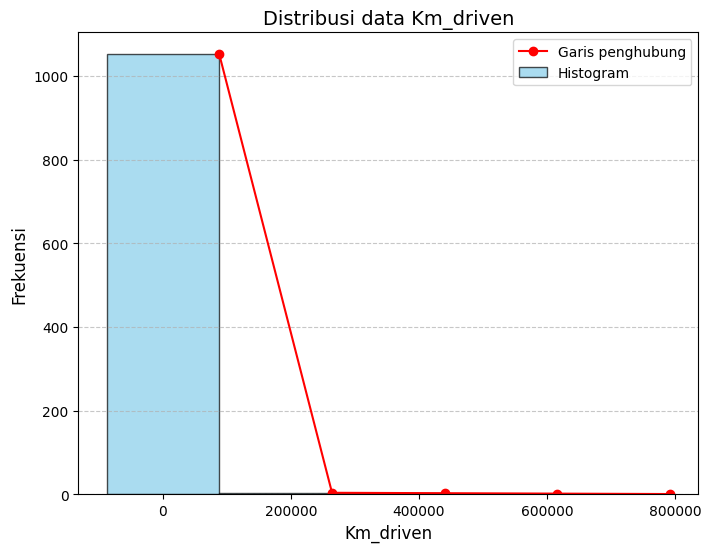

--- Distribusi data Km_driven ---
Rentang 350-176280: 1051 data
Rentang 176281-352210: 4 data
Rentang 352211-528140: 3 data
Rentang 528141-704070: 2 data
Rentang 704071-880000: 1 data
Terendah pada rentang 704070-880000, 1 data
Tertinggi pada rentang 350-176280, 1051 data




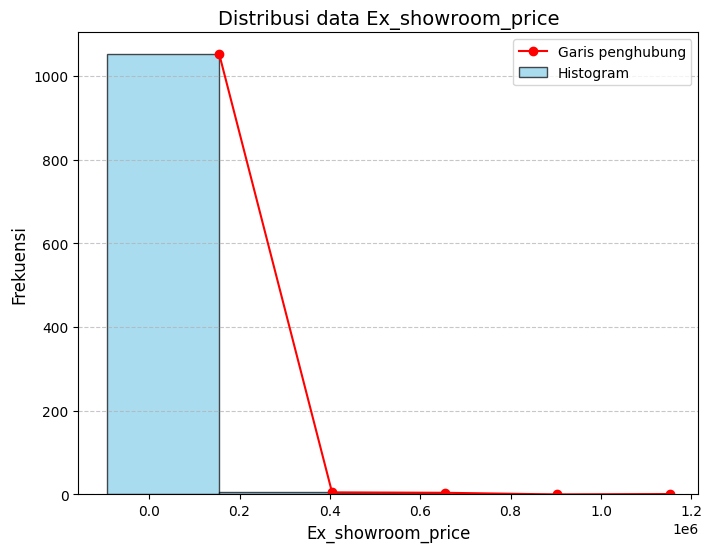

--- Distribusi data Ex_showroom_price ---
Rentang 30490-279992: 1051 data
Rentang 279993-529494: 5 data
Rentang 529495-778996: 4 data
Rentang 1028499-1278000: 1 data
Terendah pada rentang 778996-1028498, 0 data
Tertinggi pada rentang 30490-279992, 1051 data



		Analisa korelasi data numerical


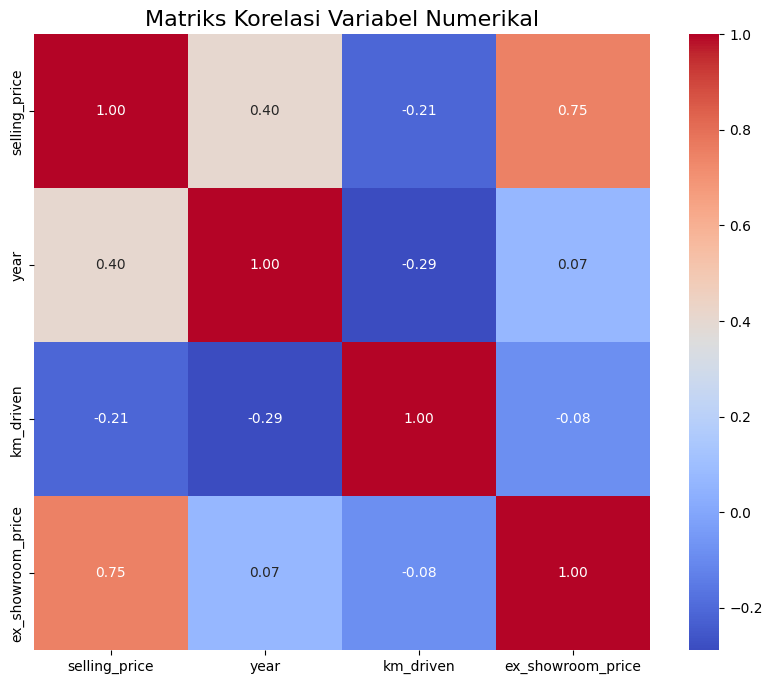

Analisis Korelasi:
Pasangan variabel dengan korelasi tinggi:
                 Var1               Var2  Correlation
3       selling_price  ex_showroom_price     0.750451
12  ex_showroom_price      selling_price     0.750451

		Analisa distribusi data kategorikal


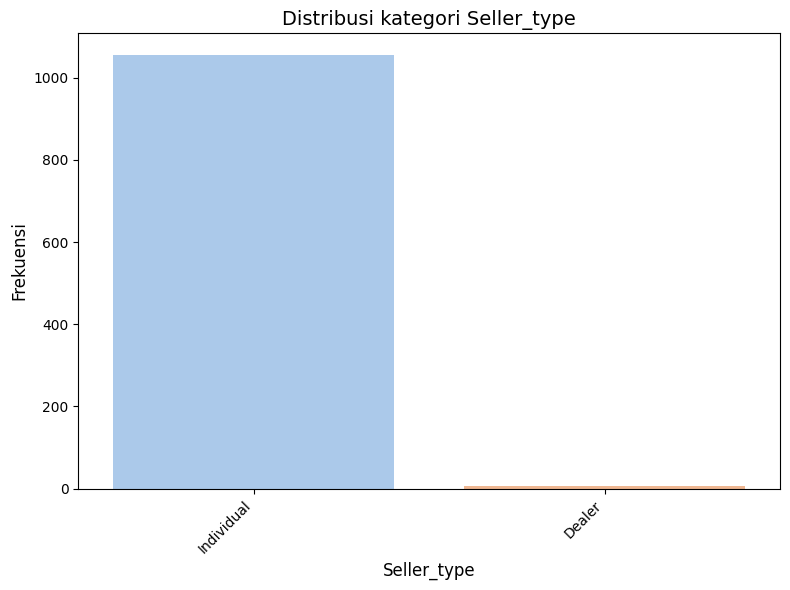


	--- Distribusi kategor Seller_type ---
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
Kategori terbanyak: Individual dengan 1055 data.
Kategori paling sedikit: Dealer dengan 6 data.



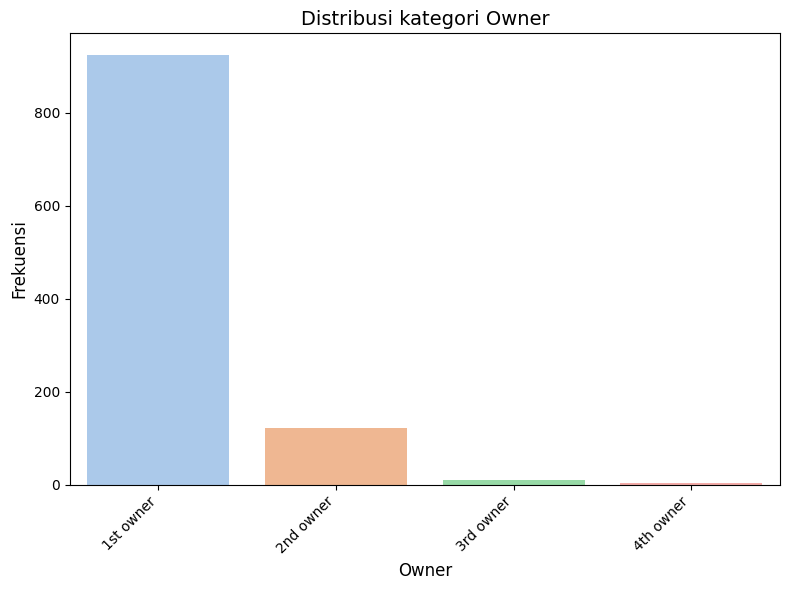


	--- Distribusi kategor Owner ---
owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64
Kategori terbanyak: 1st owner dengan 924 data.
Kategori paling sedikit: 4th owner dengan 3 data.


		Analisa korelasi data numerical


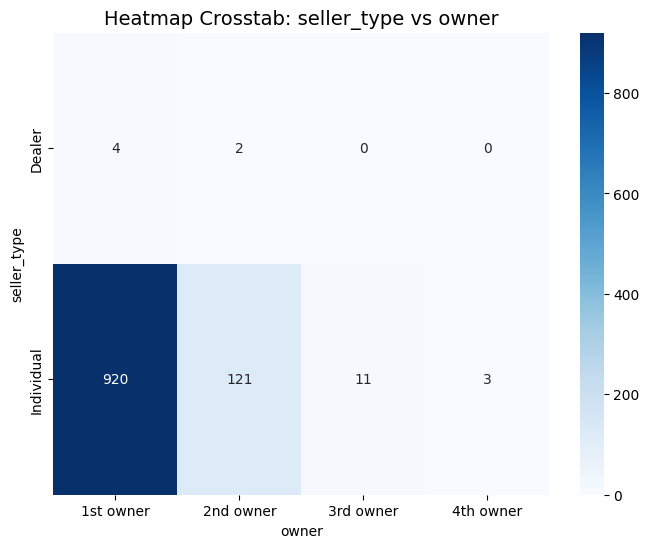

--- Analisa untuk seller_type vs owner ---
Kombinasi kategori terbanyak: ('Individual', '1st owner') dengan 920 data.
Kombinasi kategori paling sedikit (bukan 0): ('Dealer', '2nd owner') dengan nan data.


In [3]:
print("\n\t\tExploratory Data Analysis (EDA)")
#Informasi umum dataset
print("\n\tinformasi umum dataset)")
dataset.info()
#kolom kategorikal dan numerikal
print("\n\tkolom kategorical dan numerikal")
numerical_column = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_column = dataset.select_dtypes(include=['object']).columns.tolist()
print("Kolom Kategorikal : ",categorical_column)
print("Kolom Numerikal : ",numerical_column)
#missing value column
print("\n\tKolom dengan data hilang")
missing_value_column = dataset.columns[dataset.isnull().any()].tolist()
count_missing_value_column = dataset[missing_value_column].isna().sum()
print("Kolom dengan data hilang : ",missing_value_column)
print("Jumlah data hilang : \n",count_missing_value_column)
if count_missing_value_column.any():    print("Perlu penanganan data kosong! Pendekatan yang diusulkan menggunakan metode KNN Imputer")
#penanganan missing value
dataset = add_missing_value(dataset)
#Statistik deskriptif dataset
print("\n\tstatistik deskriptif dataset")
print(dataset.describe().round(2))
#inisiasi variabel distribusi dan korelasi 
# Tentukan jumlah bin yang diinginkan
num_bins = 5
#analisis distribusi data numerical
print("\n\t\tAnalisa distribusi data numerical") 
numerical_distribution_analysis(dataset, numerical_column, num_bins)
#Analisa koerelasi
print("\n\t\tAnalisa korelasi data numerical") 
numerical_correlation_analysis(dataset, numerical_column)
#kolom kategori yang diperlukan
dataset_kategorical = dataset[categorical_column].copy()
dataset_kategorical = dataset_kategorical.drop(['name'], axis=1)
categorical_column = dataset_kategorical.columns
#visualisasi dan analisa distribusi data kategorikal
print("\n\t\tAnalisa distribusi data kategorikal") 
kategorical_distribution_analysis(dataset_kategorical)
#analisa korelasi kolom kategorikal
print("\n\t\tAnalisa korelasi data numerical") 
categorical_correlation_analysis(categorical_column, dataset_kategorical)

In [4]:
#preprocessing data
#Data menampilkan data setelah data baru dimasukkan pada missing value
dataset_normalized = dataset.copy()
print("\n\t\tPreprocessing data")
print("\n\t\tData setelah penanganan missing value")
print(dataset_normalized)
#menghapus text owner
dataset_normalized['owner'] = dataset_normalized['owner'].str.replace(' owner', '')
print("\n\t\tHapus fitur name (tidak diperlukan), selling price dan ex showroom price ganti dengan fitur presentase selisih")
#proses menghitung prosentase selisih selling price
dataset_normalized = percentage_column(dataset)
#data dengan kolom atau fitur utama
dataset_main_fitur = dataset_normalized[['year', 'percentage_diff_sell_price']].copy()
#menampilan data setelah setelah fitur dihilangkan dan penambahan fitur baru
print(dataset_normalized)
#normalisasi data
dataset_numerical_normalized, dataset_categorical_normalized, dataset_normalized = normalize(dataset_normalized)
#hasil normalisasi data numerik
print("\n\t\tHasil normalisasi numerikal")
print(dataset_numerical_normalized)
#hasil normalisasi data kagorik
print("\n\t\tHasil normalisasi kategorikal")
print(dataset_categorical_normalized)
#hasil normalisasi semua
print("\n\t\thasil normalisasi semua data")
print(dataset_normalized)


		Preprocessing data

		Data setelah penanganan missing value
                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   




		Tahap klastering

		Pemilihan K optimal dengan elbow method


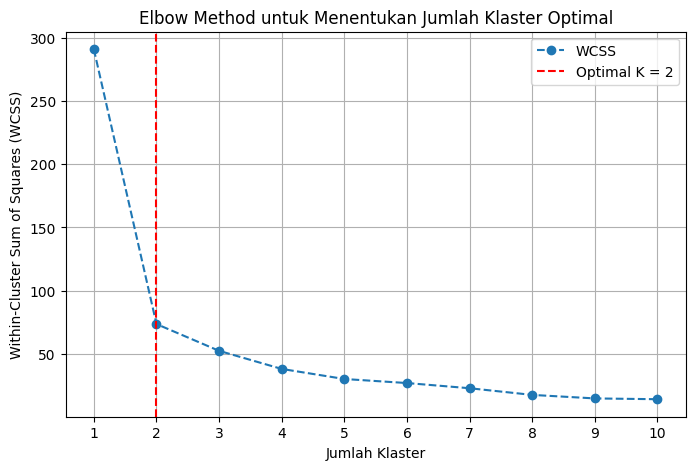

K optimal :  2

		Proses klastering menggunakan K-Means
hasil klastering
         year  km_driven  percentage_diff_sell_price  seller_type_Dealer  \
0     0.96875   0.000000                    0.412406                 0.0   
1     0.90625   0.006025                    0.203513                 0.0   
2     0.93750   0.013244                    0.005253                 0.0   
3     0.84375   0.025749                    0.114527                 0.0   
4     0.71875   0.023475                    0.321980                 0.0   
...       ...        ...                         ...                 ...   
1056  0.68750   0.568010                    0.280489                 0.0   
1057  0.75000   0.037117                    0.285990                 0.0   
1058  0.78125   0.039391                    0.307067                 0.0   
1059  0.65625   0.059853                    0.330517                 0.0   
1060  0.62500   0.104454                    0.361179                 0.0   

      seller_t

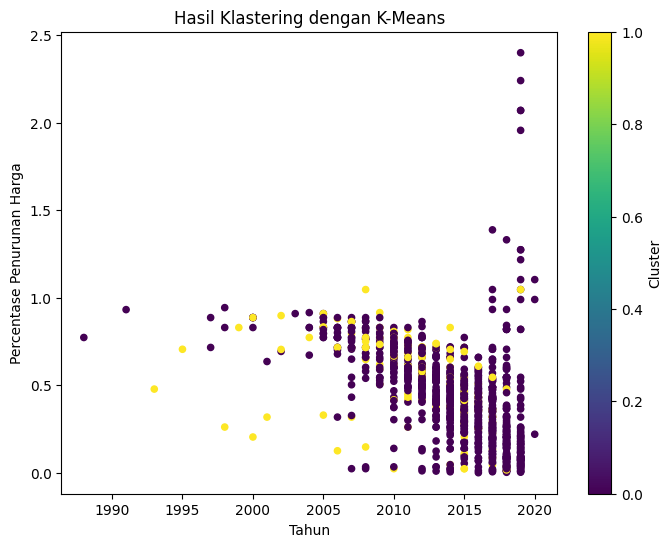

In [5]:
print("\n\t\tTahap klastering")
print("\n\t\tPemilihan K optimal dengan elbow method")
#pemilihan jumlah klaster terbaik menggunakan elbow
wcss, K, optimal_k = elbow(dataset_normalized)
#visualisasi elbow
elbow_visualization(wcss, K, optimal_k)
print("K optimal : ",optimal_k)
#kmeans klastering
print("\n\t\tProses klastering menggunakan K-Means")
labels = kmeans_clustering(dataset_normalized, optimal_k)
#menambahkan label klastering dan kolom cluster ke dataset
dataset_normalized['cluster'] = labels
dataset_main_fitur['cluster'] = labels
#hasil klastering
print("hasil klastering")
print(dataset_normalized)
#visualisasi klastering dengan fitur utama
clustering_visualization(dataset_main_fitur)

In [6]:
#Hitung Silhouette Coefficient
score = silhouette_score(dataset_normalized.drop(columns=['cluster']), labels)
print(f"Silhouette Coefficient untuk klastering dengan {optimal_k} klaster adalah: {score:.4f}")

Silhouette Coefficient untuk klastering dengan 2 klaster adalah: 0.8266


In [7]:
#tahap analisa
dataset_cluster_analyze = dataset[['year', 'seller_type', 'owner', 'km_driven']].copy()
dataset_cluster_analyze = pd.concat([dataset_cluster_analyze, dataset_main_fitur['percentage_diff_sell_price'], dataset_main_fitur['cluster']], axis=1)
print("\n\t\tAnalisa klaster\n")
print(dataset_cluster_analyze)
#analisa klaster
clustering_analysis(dataset_cluster_analyze)


		Analisa klaster

      year seller_type      owner  km_driven  percentage_diff_sell_price  \
0     2019  Individual  1st owner        350                    0.989570   
1     2017  Individual  1st owner       5650                    0.488396   
2     2018  Individual  1st owner      12000                    0.012733   
3     2015  Individual  1st owner      23000                    0.274902   
4     2011  Individual  2nd owner      21000                    0.772621   
...    ...         ...        ...        ...                         ...   
1056  2010  Individual  1st owner     500000                    0.673077   
1057  2012  Individual  1st owner      33000                    0.686275   
1058  2013  Individual  2nd owner      35000                    0.736842   
1059  2009  Individual  1st owner      53000                    0.793103   
1060  2008  Individual  1st owner      92233                    0.866667   

      cluster  
0           0  
1           0  
2           0  
3  

In [8]:
#Interpretasi hasil
interpretasi  = open("data/interpretasi_cluster.txt", "r+")
print("\n", interpretasi.read())


 1. Analisis Berdasarkan Kepemilikan Penjual (seller_type dan owner)
Cluster 0
Kepemilikan Penjual:
Mayoritas kendaraan dijual oleh penjual individu (Individual). Sebagian besar kendaraan adalah pemilik pertama (1st owner) dengan jumlah 920 kendaraan. Dealer hanya menyumbang 4 kendaraan, semuanya merupakan 1st owner.
Wawasan:
Klaster ini didominasi oleh kendaraan bekas dari pemilik pertama yang dijual langsung oleh individu. Hal ini menunjukkan bahwa kendaraan dalam klaster ini cenderung lebih "baru" atau dalam kondisi lebih baik karena hanya memiliki satu pemilik.
Cluster 1
Kepemilikan Penjual:
Sebagian besar kendaraan juga dijual oleh penjual individu. Kepemilikan kendaraan lebih bervariasi:
- 2nd owner: 121 kendaraan.
- 3rd owner: 11 kendaraan.
- 4th owner: 3 kendaraan.
Dealer hanya menyumbang 2 kendaraan dan semuanya merupakan 2nd owner.
Wawasan:
Klaster ini mencerminkan kendaraan bekas yang telah dimiliki lebih dari satu kali, cenderung lebih tua, dan lebih mungkin memiliki jarak

In [9]:
#Export dataset
dataset_normalized.to_csv('data/dataset/dataset.csv', index=False)